### Load required packages and set up data path + test galaxies

In [26]:
import pandas
pandas.options.mode.chained_assignment = None
import sys
import numpy as np
from globsML.utils.preprocessing import rescale_data, select_galaxies, create_data_dict, replace_NaN
from globsML.models.skmodels import StandardClassifier
import matplotlib.pyplot as plt
from lime_stability.stability import LimeTabularExplainerOvr
from astropy.io import fits
from globsML.utils.draw import plot_source

data_path = '../../../data/ACS_sources_original.csv'
data = pandas.read_csv(data_path)
test_galaxies = set(data[data['cluster']=='Fornax']['galaxy'].unique())

### Load and pre-process data

In [3]:
df_train, dfs_test = select_galaxies(data, test_galaxies = test_galaxies)
df_train, dfs_test = replace_NaN(df_train, dfs_test)
df = create_data_dict(data, df_train, dfs_test)
df, scaler = rescale_data(df)

input_dim = len(df['train']['inputs'][0])

Number of sources in training split after dropping rows with NaN as CI/m/color: 61468
1694 sources have been dropped.
NaN values in testing data have been replaced with the correspnding median value observed in the training split


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 2962.73it/s]

eccentricity will not be transformed. Skipped.
eccentricity_z will not be transformed. Skipped.


### Create model

In [4]:
model = StandardClassifier(method='forest', data=df)

Using default parameters: {'random_state': 42424}
Loading data...
Fitting model...


### Check model on validation data

In [5]:
model.val()

/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
model.stats_validation

,TPR,FDR,FPR,"AUC(FDR,TPR)","AUC(FPR,TPR)",# found GCs,# total GCs,# fake GCs,# sources
0,0.898734,0.061157,0.015152,0.970308,0.993365,568,632,37,3074


### Test model

In [7]:
model.test()

/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
model.stats_galaxies

,Galaxy,TPR,FDR,FPR,"AUC(FDR,TPR)","AUC(FPR,TPR)",# found GCs,# total GCs,# fake GCs,# sources
0,FCC177,0.885714,0.253012,0.052632,0.871381,0.977945,62,70,21,469
1,FCC83,0.951493,0.022989,0.014388,0.983486,0.993401,255,268,6,685
2,FCC182,0.896552,0.087719,0.014409,0.957267,0.991677,52,58,5,405
3,FCC255,0.900000,0.040000,0.007557,0.974895,0.994411,72,80,3,477
4,FCC63,0.921053,0.027778,0.017442,0.973617,0.991674,210,228,6,572
5,FCC288,0.705882,0.294118,0.015337,0.698074,0.976813,12,17,5,343
6,FCC184,0.937908,0.023810,0.017995,0.991419,0.996031,287,306,7,695
7,FCC202,0.935065,0.044248,0.024691,0.979321,0.993009,216,231,10,636
8,FCC43,0.837838,0.184211,0.016627,0.915113,0.991012,31,37,7,458
9,FCC170,0.915493,0.269663,0.079470,0.767799,0.955998,65,71,24,373


#### Get evaluation metrics averaged per galaxy

In [9]:
model.stats_galaxies.mean()

/tmp/ipykernel_314/3415850949.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  model.stats_galaxies.mean()


TPR               0.863946
FDR               0.140764
FPR               0.026656
AUC(FDR,TPR)      0.906056
AUC(FPR,TPR)      0.985682
# found GCs     130.279070
# total GCs     143.279070
# fake GCs       10.930233
# sources       506.209302
dtype: float64

#### Get evaluation metrics averaged over all sources (not per galaxy)

In [10]:
model.stats_all

,Galaxy,TPR,FDR,FPR,"AUC(FDR,TPR)","AUC(FPR,TPR)",# found GCs,# total GCs,# fake GCs,# sources
0,ALL,0.909268,0.077404,0.030117,0.956125,0.987791,5602,6161,470,21767


#### GCs not found

In [11]:
model.false_negatives

{'FCC277': array([ 12,  55,  65, 151, 171, 188, 252, 268, 294]),
 'FCC100': array([ 14, 115, 212, 217, 257, 278, 336]),
 'FCC303': array([126]),
 'FCC55': array([ 12,  16,  17,  20,  69, 183, 357]),
 'FCC136': array([], dtype=int64),
 'FCC301': array([  4,  11,  38,  43, 271]),
 'FCC95': array([137, 282]),
 'FCC167': array([ 15,  89, 130, 153, 235, 301, 362, 363, 470, 475, 562, 591, 620,
        623, 635, 654, 698, 707, 725, 735, 752, 822]),
 'FCC19': array([ 37, 272]),
 'FCC324': array([ 8, 22, 50, 52, 85]),
 'FCC182': array([ 60,  78, 158, 197, 232, 364]),
 'FCC310': array([ 22, 166, 299]),
 'FCC26': array([ 77, 172]),
 'FCC288': array([159, 166, 169, 189, 268]),
 'FCC219': array([ 12,  33, 117, 134, 169, 205, 249, 260, 271, 279, 291, 306, 313,
        333, 367, 369, 382, 434, 455, 474, 527, 534, 558, 573, 607, 709]),
 'FCC143': array([ 61, 140, 163, 182]),
 'FCC190': array([ 50,  53,  80, 123, 125, 160, 178, 211, 261, 337, 356, 363, 438]),
 'FCC249': array([ 14,  32,  44,  77,  89, 

#### Wrongly detected GCs

In [13]:
model.false_positives

{'FCC277': array([158, 164, 172, 173, 183, 193, 219, 256]),
 'FCC100': array([113, 131, 136]),
 'FCC303': array([ 87, 169, 226, 281, 305]),
 'FCC55': array([283]),
 'FCC136': array([ 37,  96, 110, 142]),
 'FCC301': array([ 90,  95, 180]),
 'FCC95': array([190]),
 'FCC167': array([ 42, 116, 182, 296, 324, 356, 379, 398, 411, 515, 545, 558, 563,
        574, 593, 616, 650, 681, 720]),
 'FCC19': array([ 23,  74, 108, 174, 306, 313]),
 'FCC324': array([196, 211, 245]),
 'FCC182': array([ 17,  48, 205, 211, 401]),
 'FCC310': array([ 39, 112, 183, 197, 217, 262]),
 'FCC26': array([ 75, 186, 200, 203, 204, 206, 221]),
 'FCC288': array([ 10,  11, 121, 173, 175]),
 'FCC219': array([ 40,  80,  90, 115, 145, 223, 245, 364, 415, 452, 477, 592, 681,
        728]),
 'FCC143': array([  5,   8,  32,  36,  39,  51, 133, 159, 304]),
 'FCC190': array([118, 225, 244, 328]),
 'FCC249': array([ 85, 210, 241, 245, 325, 357, 362, 436]),
 'FCC152': array([129, 174, 194, 219, 346]),
 'FCC276': array([147, 167, 

#### GCs found in, e.g.,  FCC170

In [19]:
model.found_GCs['FCC170']

array([  8,  13,  26,  38,  43,  54,  59,  70,  78,  79,  86,  89,  91,
        96, 103, 114, 116, 127, 131, 135, 142, 146, 150, 155, 156, 161,
       164, 167, 176, 180, 187, 188, 196, 197, 203, 204, 209, 215, 226,
       231, 232, 233, 234, 239, 241, 246, 247, 248, 250, 252, 259, 265,
       266, 269, 273, 274, 277, 284, 286, 289, 294, 296, 313, 325, 354])

#### Plot ROC Curve

Text(0, 0.5, 'TPR')

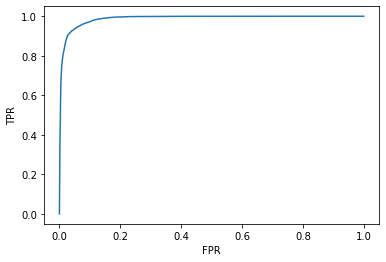

In [20]:
plt.plot(model.auc_curve_fpr['ALL']['fpr'], model.auc_curve_fpr['ALL']['tpr'])
plt.xlabel('FPR')
plt.ylabel('TPR')

#### Plot FDR against TPR

Text(0, 0.5, 'TPR')

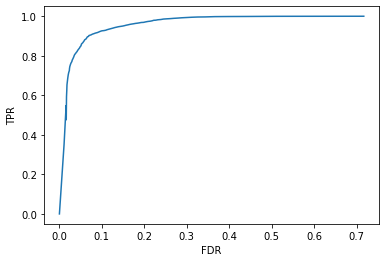

In [21]:
plt.plot(model.auc_curve_fdr['ALL']['fdr'], model.auc_curve_fdr['ALL']['tpr'])
plt.xlabel('FDR')
plt.ylabel('TPR')

### Looking at general feature importance (as used for creating the ensemble)

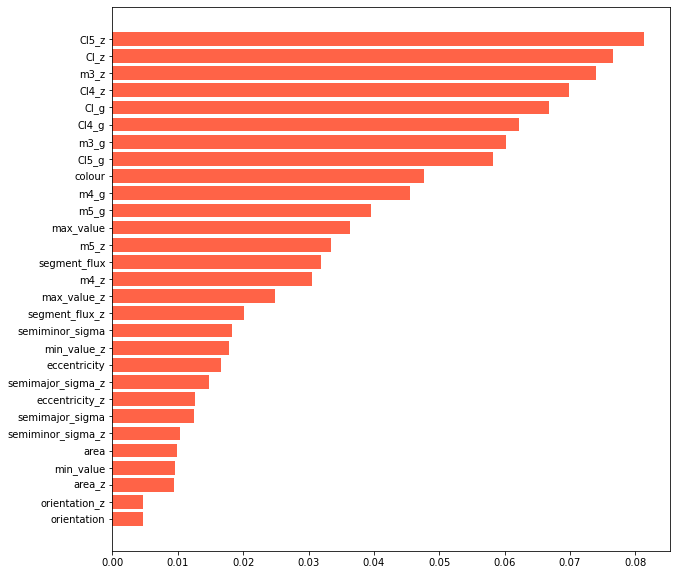

In [35]:
scores = model.model.feature_importances_
idsort = np.argsort(scores)[::-1]
scores = np.array(scores)[idsort]
fnames = np.array(model.train_data['feature_name'])[idsort]

plt.figure(figsize=(10,10))
plt.barh(np.arange(len(scores)), scores[::-1], color='tomato')
_ = plt.yticks(np.arange(len(scores)), fnames[::-1], rotation=0)

### Taking a closer look at an individual source

#### First, plot the filters of a single source

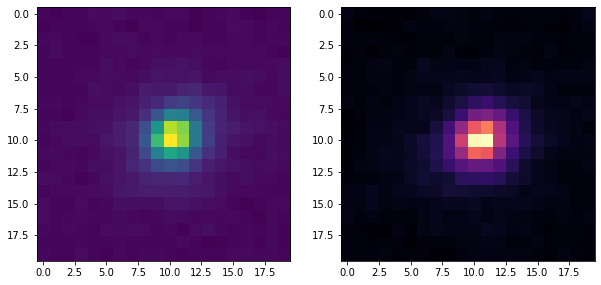

In [27]:
images = fits.getdata('../../../data/ImageData/{}_images.fits'.format('FCC170'))    
plot_source(images[8])

#### Create an explanation for the classification (here: as a GC) using LIME

[0.60204375]
CSI:  99.46 
VSI:  100.0 



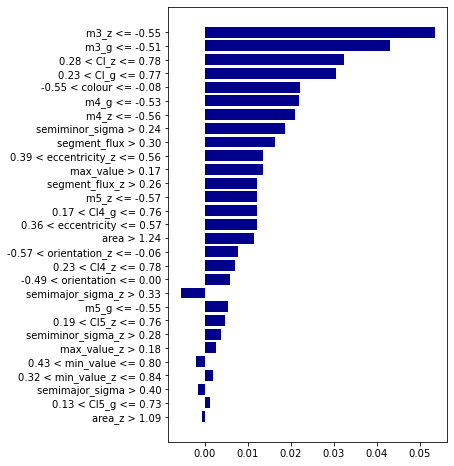

In [30]:
explainer = LimeTabularExplainerOvr(model.train_data['inputs'], feature_names=model.train_data['feature_name'], kernel_width = 1.75, class_names=['no_GC', 'GC'])
idx = np.where((model.test_data['galaxy'] == 'FCC170')*(model.test_data['ID'] == 8))[0][0]
params = {"data_row": model.test_data['inputs'][idx],
          "predict_fn": model.model.predict_proba,
          "num_samples": 5000,
          "num_features": 29,
          "distance_metric": "euclidean"}
exp = explainer.explain_instance(**params)
print(exp.local_pred)
csi, vsi = explainer.check_stability(n_calls=10,**params,index_verbose=False)
print("CSI: ",csi,"\nVSI: ",vsi,"\n")
plt.figure(figsize=(5,8))

fnames = np.array(exp.as_list())[:,0]
values = list(map(float, np.array(exp.as_list())[:,1]))

plt.barh(np.arange(29), values[::-1], height=0.8, color = 'darkblue')
_ = plt.yticks(np.arange(29), fnames[::-1], rotation=0)

#### Values are rescaled, so reverse the rescaling to get the original value ranges

In [37]:
scaler['m3_z'].reverse_transform(-0.55)

23.8346750053755

In [38]:
scaler['m3_g'].reverse_transform(-0.51)

24.942749751762495

In [39]:
scaler['CI_z'].reverse_transform(0.28), scaler['CI_z'].reverse_transform(0.78)

(1.4138965569889945, 1.7652063289516984)

In [40]:
scaler['CI_g'].reverse_transform(0.23), scaler['CI_g'].reverse_transform(0.77)

(1.3084692164861393, 1.6635129941787876)